0.7492369341607631 1.4964536417853527 0.6979400863492848 0.49787937929699966 0.20177364190289435
0.25 0.5 0.2 1.5 0.7


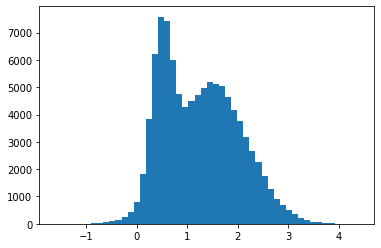

In [3]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

tau = 0.25
mu1 = 0.5
sigma1 = 0.2
mu2 = 1.5
sigma2 = 0.7
n = 100000

x_1 = np.random.normal(mu1, sigma1, int(tau*n))
x_2 = np.random.normal(mu2, sigma2, int((1-tau)*n))
x = np.r_[x_1, x_2]

plt.hist(x, bins=50)

def t(x, tau, mu1, mu2, sigma12, sigma22):
	tau0 = tau
	tau1 = 1 - tau

	T1 = tau0 / np.sqrt(2*np.pi*sigma12) * np.exp(-0.5*((x - mu1)**2)/sigma12)
	T2 = tau1 / np.sqrt(2*np.pi*sigma22) * np.exp(-0.5*((x - mu2)**2)/sigma22)
	T_norm = T1 + T2

	T1 = np.divide(T1, T_norm, out=np.full_like(T_norm, 0.5), where=T_norm!=0)
	T2 = np.divide(T2, T_norm, out=np.full_like(T_norm, 0.5), where=T_norm!=0)

	return np.vstack((T1,T2))

def theta(x, *old):
	T1, T2 = t(x, *old)
	tau = np.sum(T1) / np.sum(T1+T2)
	mu1 = np.sum(x * T1) / np.sum(T1)
	mu2 = np.sum(x * T2) / np.sum(T2)
	sigma12 = np.sum((x - mu1)**2 * T1) / np.sum(T1)
	sigma22 = np.sum((x - mu2)**2 * T2) / np.sum(T2)
	return tau, mu1, mu2, sigma12, sigma22

def em_double_gauss(x, tau, mu1, sigma1, mu2, sigma2, rtol=1e-3):
    th = (tau, mu1, mu2, sigma1**2, sigma2**2)
    for i in range(100):
        th = theta(x, *th)
    
    return (th[0], th[1], th[3]**0.5, th[2], th[4]**0.5)

new_params = em_double_gauss(x, 0.5, np.mean(x)-np.std(x), np.mean(x)+np.std(x), np.std(x), np.std(x))

print(*new_params)
print(tau, mu1, sigma1, mu2, sigma2)

T1, T2 = t(x, *new_params)

